In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
data = pd.read_csv('engineered.csv')
data.head()

,date,demand,Friday,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday,TOR_heat,...,PET_heat,PET_cold,THU_heat,THU_cold,BEL_heat,BEL_cold,CHA_heat,CHA_cold,SAR_heat,SAR_cold
0,2009-01-01,391706,0,0,0,0,1,0,0,0.0,...,0.0,42.6,0.0,41.2,0.0,38.0,0.0,32.000000,0.0,34.3
1,2009-01-02,398441,1,0,0,0,0,0,0,0.0,...,0.0,28.1,0.0,44.8,0.0,30.0,0.0,30.000000,0.0,28.3
2,2009-01-03,392559,0,0,1,0,0,0,0,0.0,...,0.0,33.0,0.0,46.5,0.0,29.5,0.0,28.666667,0.0,31.6
3,2009-01-04,400256,0,0,0,1,0,0,0,0.0,...,0.0,36.9,0.0,42.1,0.0,35.0,0.0,27.333333,0.0,28.3
4,2009-01-05,429761,0,1,0,0,0,0,0,0.0,...,0.0,30.4,0.0,52.2,0.0,27.0,0.0,26.000000,0.0,28.6


In [3]:
data.drop('date', axis=1, inplace=True)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3652 entries, 0 to 3651
Data columns (total 42 columns):
demand       3652 non-null int64
Friday       3652 non-null int64
Monday       3652 non-null int64
Saturday     3652 non-null int64
Sunday       3652 non-null int64
Thursday     3652 non-null int64
Tuesday      3652 non-null int64
Wednesday    3652 non-null int64
TOR_heat     3652 non-null float64
TOR_cold     3652 non-null float64
OTT_heat     3652 non-null float64
OTT_cold     3652 non-null float64
HAM_heat     3652 non-null float64
HAM_cold     3652 non-null float64
ROS_heat     3652 non-null float64
ROS_cold     3652 non-null float64
LON_heat     3652 non-null float64
LON_cold     3652 non-null float64
POR_heat     3652 non-null float64
POR_cold     3652 non-null float64
OSH_heat     3652 non-null float64
OSH_cold     3652 non-null float64
WIN_heat     3652 non-null float64
WIN_cold     3652 non-null float64
BAR_heat     3652 non-null float64
BAR_cold     3652 non-null float64

In [5]:
from sklearn.model_selection import train_test_split, cross_val_predict, cross_val_score

In [6]:
y = data['demand']
X = data.drop('demand', axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

### Linear models

In [7]:
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.metrics import mean_squared_error

In [8]:
cv_preds = cross_val_predict(LinearRegression(), X=X_train, y=y_train, cv=5)
np.sqrt(mean_squared_error(y_train, cv_preds))

18664.62572629493

In [9]:
# What about with normalize=True?
np.sqrt(mean_squared_error(y_train, cross_val_predict(LinearRegression(normalize=True), X=X_train, y=y_train, cv=5)))

18666.2992798945

Let's see how the predictions (with normalize=False) compare with the sorted true values.

In [10]:
temp = pd.DataFrame({'y_train': y_train, 'cv_preds': cv_preds})
temp.sort_values('y_train', inplace=True)

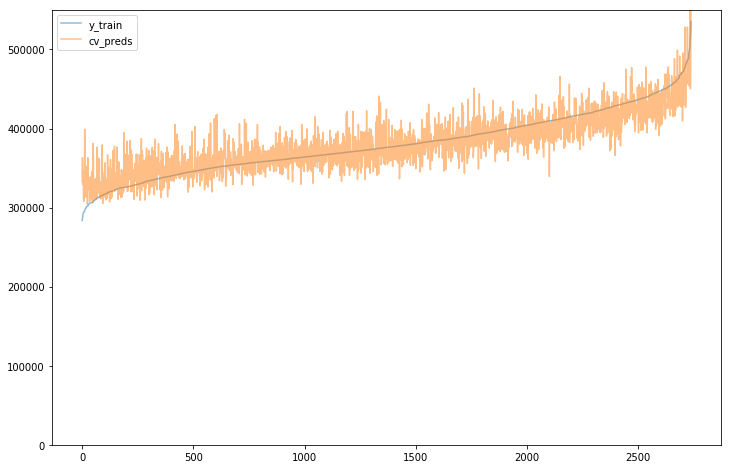

In [11]:
temp.reset_index(inplace=True)
temp.plot(y=['y_train', 'cv_preds'], alpha=0.5, ylim=[0, 550000], figsize=(12, 8))

The predictions look pretty noisy. They do increase noticably with the true high values, but don't track well with the true low values.

Let's look at the intercept and coefficients of the trained linear regression (when normalize=False).

In [12]:
lr = LinearRegression()
lr.fit(X=X_train, y=y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [13]:
lr.intercept_

303686.6017380646

In [14]:
pd.DataFrame({'Feature': list(data.drop('demand', axis=1).columns), 'Coefficient': lr.coef_})

,Feature,Coefficient
0,Friday,4259.651631
1,Monday,5017.779730
2,Saturday,-19872.728665
3,Sunday,-27617.033414
4,Thursday,12164.913439
5,Tuesday,12196.705214
6,Wednesday,13850.712065
7,TOR_heat,-426.509824
8,TOR_cold,-1675.504042
9,OTT_heat,1531.335951


In absolute value, the biggest coefficients are those corresponding to the one-hot Saturday and Sunday features and these are both negative (-19873 and -27617, respectively). The next largest are the positive coefficients for the other days of the week, with those of Tuesday (12197), Wednesday (13851) and Thursday (12165) being much larger than those of Monday and Friday (5018 and 4260). Those 7 coefficients are all consistent with the mean demand by day of the week, which we saw early in the feature_engineering_daily notebook. According to this linear regression, every day of the week is a more important predictor than the daily temperatures at any of the included weather stations.

Judging from the correlation scores shown at the end of the feature_engineering_daily notebook, the coefficients for the heat and cold features ought to be positive and those of the heat features should be higher than those of the cold features. Indeed, for 15 of the 17 regions, the heat coefficients are higher than the cold coefficients. However, 10 of the 34 heat and cold coefficients are negative, including both of those for Toronto (-427 for heat, -1676 for cold), which is particularly surprising given that these two features should have the largest positive influence given the size of the region's population (nearly half that of the whole province). Amoung the coefficients for the temperature features, there is a great deal of variation, ranging from -2571 (Peterborough heat) to 3438 (Oshawa heat). This variation is probably the result of over-fitting to random differences between the weather stations. Some degree of overfitting is to be expected with only 3652 data points having 41 dimensions.

Let's see how these attributes differ when the linear regression is set to normalize=True (meaning each variable is rescaled to have their range in common).

In [15]:
lr2 = LinearRegression(normalize=True)
lr2.fit(X=X_train, y=y_train)
lr2.intercept_

-8.73803626435602e+16

In [16]:
pd.DataFrame({'Feature': list(data.drop('demand', axis=1).columns), 'Coefficient': lr2.coef_})

,Feature,Coefficient
0,Friday,8.738036e+16
1,Monday,8.738036e+16
2,Saturday,8.738036e+16
3,Sunday,8.738036e+16
4,Thursday,8.738036e+16
5,Tuesday,8.738036e+16
6,Wednesday,8.738036e+16
7,TOR_heat,-4.292257e+02
8,TOR_cold,-1.675681e+03
9,OTT_heat,1.532846e+03


Looking at these coefficients, it's clear that this data is totally unsuited to normalization by the linear regressor. The coefficients for the days of the week are all identical and 10^13 times larger than those of the heat and cold features.

In [17]:
lr_preds = lr.predict(X_test)
np.sqrt(mean_squared_error(y_test, lr_preds))

18558.918065404534

In [18]:
lr2_preds = lr2.predict(X_test)
np.sqrt(mean_squared_error(y_test, lr2_preds))

18555.093514559918

### Random Forests and GBRs

In [19]:
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor

In [20]:
rf_cv_preds = cross_val_predict(RandomForestRegressor(n_estimators=60, random_state=42), X=X_train, y=y_train, cv=5)
np.sqrt(mean_squared_error(y_train, rf_cv_preds))

15804.283313882037

The root-mean-squared-error of a basic RF is better than that of the linear regression (18665)

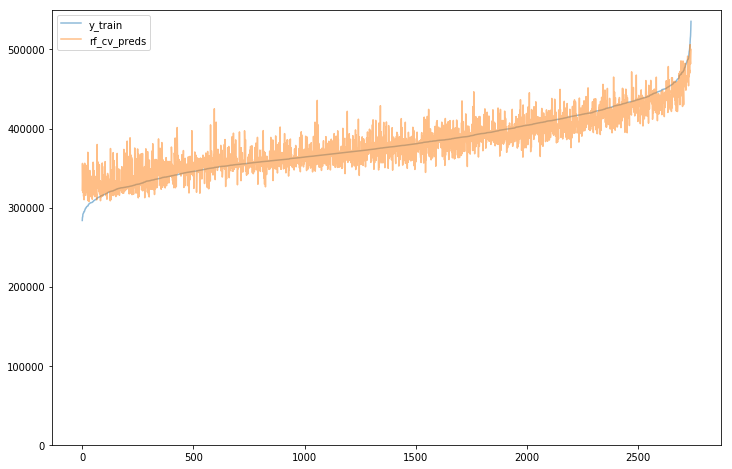

In [21]:
temp = pd.DataFrame({'y_train': y_train, 'rf_cv_preds': rf_cv_preds})
temp.sort_values('y_train', inplace=True)
temp.reset_index(inplace=True)
temp.plot(y=['y_train', 'rf_cv_preds'], alpha=0.5, ylim=[0, 550000], figsize=(12, 8))

When compared with the sorted true values, the random forest's predictions look pretty noisy, like those of the linear regression. Like the linear model, it also has a hard time with the extreme values.

In [22]:
rf = RandomForestRegressor(n_estimators=60, random_state=42)
rf.fit(X=X_train, y=y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=60, n_jobs=None,
           oob_score=False, random_state=42, verbose=0, warm_start=False)

In [23]:
pd.DataFrame({'Feature': list(data.drop('demand', axis=1).columns), 'Feature Importance %': rf.feature_importances_ * 100})

,Feature,Feature Importance %
0,Friday,0.135927
1,Monday,0.140313
2,Saturday,5.215713
3,Sunday,6.800328
4,Thursday,0.054931
5,Tuesday,0.071660
6,Wednesday,0.113120
7,TOR_heat,1.711449
8,TOR_cold,1.686848
9,OTT_heat,0.316956


According to this random forest, by far the most important feature (38% of all splittings) is how cold it is in the St. Catharines - Niagara region. The next most important feature (a distant second place at 10%) is heat in Kingston. Saturday and Sunday have some importance (5% and 7%, respectively), as does cold in Sarnia (5%) and cold in Chatham-Kent (4%). All other features are 2.5% or less. These figures make the validity of this model very doubtful and I attribute it to heavy overfitting to noise in the data. As noted before, some degree of overfitting is to be expected with only 3652 data points having 41 dimensions, but in this case it's extreme.

In [24]:
rf_preds = rf.predict(X_test)
np.sqrt(mean_squared_error(y_test, rf_preds))

15767.457663616224

#### Gradient Boosting Regressor (GBR)

In [25]:
gbr_cv_preds = cross_val_predict(GradientBoostingRegressor(n_estimators=100, random_state=42), X=X_train, y=y_train, cv=5)
np.sqrt(mean_squared_error(y_train, gbr_cv_preds))

15248.283993343548

This root-mean-squared-error of this basic GBR is somewhat better than that of the RF (15804) and obviously better than that of the linear regression (18665)

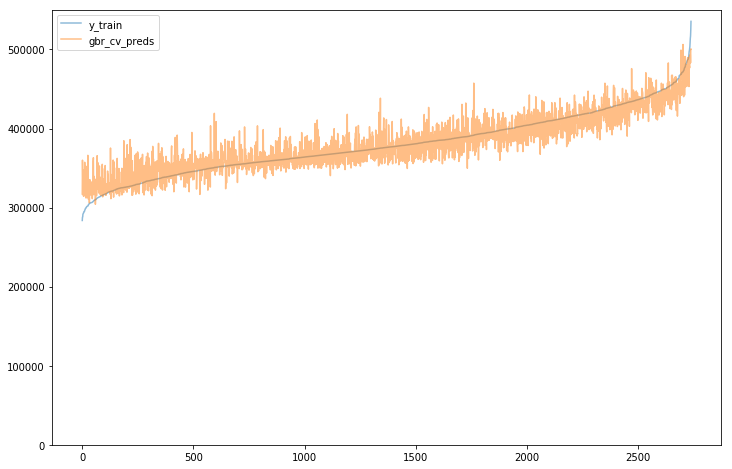

In [26]:
temp = pd.DataFrame({'y_train': y_train, 'gbr_cv_preds': gbr_cv_preds})
temp.sort_values('y_train', inplace=True)
temp.reset_index(inplace=True)
temp.plot(y=['y_train', 'gbr_cv_preds'], alpha=0.5, ylim=[0, 550000], figsize=(12, 8))

Like the linear model and RF, the gradient boosting regressor has a particularly hard time with the extreme values.

In [27]:
gbr = GradientBoostingRegressor(n_estimators=100, random_state=42)
gbr.fit(X=X_train, y=y_train)

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.1, loss='ls', max_depth=3, max_features=None,
             max_leaf_nodes=None, min_impurity_decrease=0.0,
             min_impurity_split=None, min_samples_leaf=1,
             min_samples_split=2, min_weight_fraction_leaf=0.0,
             n_estimators=100, n_iter_no_change=None, presort='auto',
             random_state=42, subsample=1.0, tol=0.0001,
             validation_fraction=0.1, verbose=0, warm_start=False)

In [28]:
pd.DataFrame({'Feature': list(data.drop('demand', axis=1).columns), 'Feature Importance %': gbr.feature_importances_ * 100})

,Feature,Feature Importance %
0,Friday,0.000000
1,Monday,0.016905
2,Saturday,6.274682
3,Sunday,9.121569
4,Thursday,0.370938
5,Tuesday,0.307606
6,Wednesday,0.402462
7,TOR_heat,3.021712
8,TOR_cold,3.069237
9,OTT_heat,0.376448


The feature importances for the gradient boosting regressor aren't all that different from those of the random forest, which isn't overly surprising since they're both ensembles composed of the same type of estimator (decision trees). This time the model is less dominated by cold in St. Catherlines - Niagara (26% instead of 38%), heat in Kingston is down (from 10% to 7%), and the importance of the rest of the features are up a little or about the same. Sunday is now in second place at 9.1% and Saturday is 6%. The cold in Chatham-Kent is now in third place at 8.6%. As with the random forest, the model has overfit to the data, though a bit less severly.

In [29]:
gbr_preds = gbr.predict(X_test)
np.sqrt(mean_squared_error(y_test, gbr_preds))

14995.140507874154

### Multi-Layer Perceptrons

In [30]:
from sklearn.neural_network import MLPRegressor
from sklearn.preprocessing import StandardScaler

In [31]:
mlp_cv_preds = cross_val_predict(MLPRegressor(max_iter=6400), X=X_train, y=y_train, cv=5)
np.sqrt(mean_squared_error(y_train, mlp_cv_preds))

D:\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (6400) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
D:\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (6400) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
D:\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (6400) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
D:\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (6400) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
D:\Anaconda3\lib\site-packages\s

37418.44650344142

In [32]:
import time
start = time.time()
mlp_cv_preds = cross_val_predict(MLPRegressor(max_iter=12800), X=X_train, y=y_train, cv=5)
print('Run took {} minutes.'.format(round((time.time() - start)/60, 2)))
np.sqrt(mean_squared_error(y_train, mlp_cv_preds))

Run took 9.52 minutes.


17175.30646013421

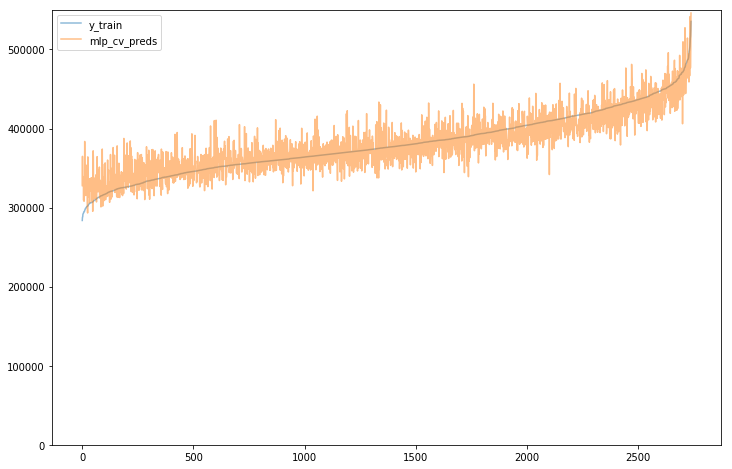

In [33]:
temp = pd.DataFrame({'y_train': y_train, 'mlp_cv_preds': mlp_cv_preds})
temp.sort_values('y_train', inplace=True)
temp.reset_index(inplace=True)
temp.plot(y=['y_train', 'mlp_cv_preds'], alpha=0.5, ylim=[0, 550000], figsize=(12, 8))

In [34]:
mlp = MLPRegressor(max_iter=12800)
mlp.fit(X_train, y_train)
mlp_preds = mlp.predict(X_test)
np.sqrt(mean_squared_error(y_test, mlp_preds))

16695.27097587795

#### An MLP on re-scaled data

In [35]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
# y_train_scaled = scaler.fit_transform(y_train.values.reshape(-1, 1))
# y_test_scaled = scaler.transform(y_test.values.reshape(-1, 1))

D:\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
D:\Anaconda3\lib\site-packages\sklearn\base.py:462: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
D:\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  This is separate from the ipykernel package so we can avoid doing imports until


In [36]:
start = time.time()
sc_mlp_cv_preds = cross_val_predict(MLPRegressor(max_iter=12800), X=X_train_scaled, y=y_train, cv=5)
print('Run took {} minutes.'.format(round((time.time() - start)/60, 2)))
np.sqrt(mean_squared_error(y_train, sc_mlp_cv_preds))

D:\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (12800) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
D:\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (12800) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
D:\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (12800) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
D:\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: UserWarning: Training interrupted by user.
  warnings.warn("Training interrupted by user.")


Run took 13.55 minutes.


D:\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (12800) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


82012.03527180488

In [37]:
start = time.time()
sc_mlp_cv_preds = cross_val_predict(MLPRegressor(max_iter=25600), X=X_train_scaled, y=y_train, cv=5)
print('Run took {} minutes.'.format(round((time.time() - start)/60, 2)))
np.sqrt(mean_squared_error(y_train, sc_mlp_cv_preds))

Run took 35.53 minutes.


15377.1873840615

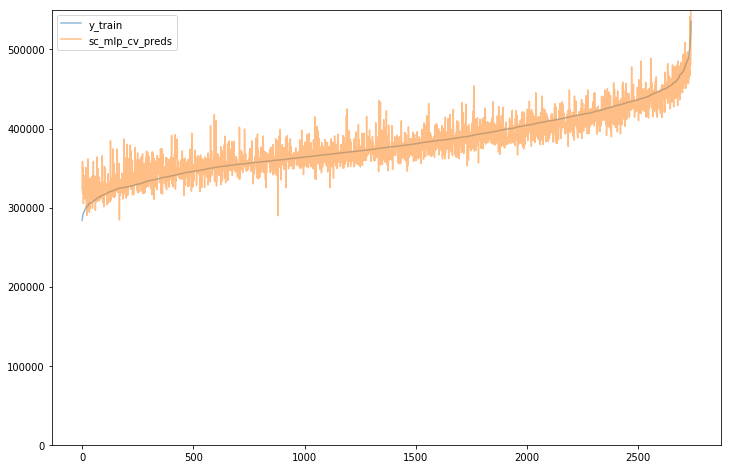

In [38]:
temp = pd.DataFrame({'y_train': y_train, 'sc_mlp_cv_preds': sc_mlp_cv_preds})
temp.sort_values('y_train', inplace=True)
temp.reset_index(inplace=True)
temp.plot(y=['y_train', 'sc_mlp_cv_preds'], alpha=0.5, ylim=[0, 550000], figsize=(12, 8))

In [39]:
sc_mlp = MLPRegressor(max_iter=25600)
sc_mlp.fit(X_train, y_train)
sc_mlp_preds = sc_mlp.predict(X_test)
np.sqrt(mean_squared_error(y_test, sc_mlp_preds))

17137.347156214986

### Conclusion

The small dataset of only 3652 observations and the large number of dimensions (41) limits what can be done with this dataset. I think data on additional causal factors is neccessary, but I can't seem to find information on what the other causal factors are. They may include variations industrial activity. The utility price of electricity (which is updated every 5 minutes and only applies to bulk purchasers, not residential or small-scale commercial customers) can only have an effect on demand if the information is communicated to purchasers in real time. To the best of my understanding, it is only communicated in aggregate on bill totals. As shown towards the end of the demand_exploration notebook, even the hourly average price is extremely chaotic, making difficult or impossible to incorporate pricing into the planning of high-consumption tasks.